# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_KEY")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_grouped_by_year_df = sfo_data.groupby("year")["housing_units"].mean()
sfo_grouped_by_year_df

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
# Save the dataframe as a csv file
sfo_grouped_by_year_df.to_csv("sfo_grouped_by_year.csv")

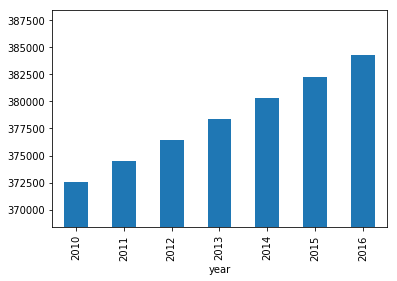

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
minimum = sfo_grouped_by_year_df.min()
maximum = sfo_grouped_by_year_df.max()
std = sfo_grouped_by_year_df.std()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
sfo_grouped_by_year_df.plot(kind="bar", ylim=(minimum-std, maximum+std))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
price_per_sqr_foot_and_avg_rent = sfo_data.groupby("year")["sale_price_sqr_foot", "gross_rent"].mean()
price_per_sqr_foot_and_avg_rent.reset_index(inplace=True)
price_per_sqr_foot_and_avg_rent

year  sale_price_sqr_foot  gross_rent
0  2010           369.344353        1239
1  2011           341.903429        1530
2  2012           399.389968        2324
3  2013           483.600304        2971
4  2014           556.277273        3528
5  2015           632.540352        3739
6  2016           697.643709        4390

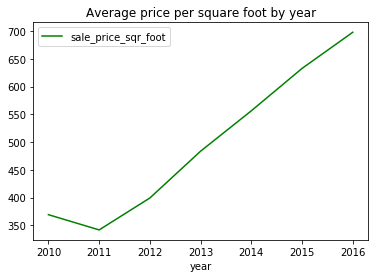

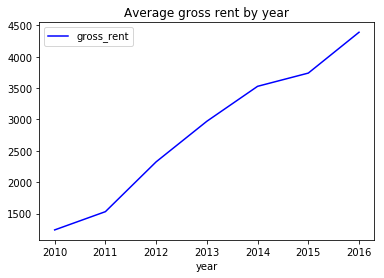

In [8]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent


# Line chart for average sale price per square foot
price_per_sqr_foot_and_avg_rent.plot(x="year", y="sale_price_sqr_foot", color="green", title="Average price per square foot by year")


# Line chart for average montly rent
price_per_sqr_foot_and_avg_rent.plot(x="year", y="gross_rent", color="blue", title="Average gross rent by year")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_data = sfo_data.groupby(["year","neighborhood"]).mean()
neighborhood_data.reset_index(inplace=True)
neighborhood_data = neighborhood_data.set_index("year")
neighborhood_data

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195426         384242        4390

[397 rows x 4 columns]

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
from panel.interact import interact

# define the interact function
def choose_neighborhood(neighborhood):
    return neighborhood_data[neighborhood_data["neighborhood"] == neighborhood]["sale_price_sqr_foot"].hvplot(kind="line")

# The plot should have a dropdown selector for the neighborhood
#create a non-duplicated list of neighborhood names
neighborhood_list = list(set(neighborhood_data["neighborhood"]))

interact(choose_neighborhood, neighborhood = neighborhood_list)


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Outer Parkside', ...], value='Outer Parkside')
    [1] Row
        [0] HoloViews(Curve, name='interactive01554')

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):
    return neighborhood_data[neighborhood_data["neighborhood"] == neighborhood]["gross_rent"].hvplot(kind="line")

# The plot should have a dropdown selector for the neighborhood
#create a non-duplicated list of neighborhood names
neighborhood_list = list(set(neighborhood_data["neighborhood"]))

interact(choose_neighborhood, neighborhood = neighborhood_list)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Outer Parkside', ...], value='Outer Parkside')
    [1] Row
        [0] HoloViews(Curve, name='interactive01736')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [65]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_price_per_unit = sfo_data["sale_price_sqr_foot"]
neighborhood_average_price_per_unit = sfo_data.groupby("neighborhood").mean().sort_values("sale_price_sqr_foot", ascending=False)
top_10_expensive_neighborhoods = neighborhood_average_price_per_unit.head(10)
top_10_expensive_neighborhoods

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000

In [66]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive_neighborhoods["sale_price_sqr_foot"].hvplot(kind="bar", rot=45, title="Top 10 Most Expensive Neighborhoods in San Fransisco (Averaged between 20)")

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [14]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_data

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195426         384242        4390

[397 rows x 4 columns]

In [15]:
# Plotting the data from the top 10 expensive neighborhoods
list_of_top10_neighborhoods = list(neighborhood_average_price_per_unit.head(10).index)
neighborhood_data = neighborhood_data.drop(columns=["housing_units"])

def choose_neighborhood(neighborhood):
    return neighborhood_data[neighborhood_data["neighborhood"] == neighborhood].hvplot(kind="bar", rot=90)

interact(choose_neighborhood, neighborhood = list_of_top10_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Union Square District', ...], value='Union Square District')
    [1] Row
        [0] HoloViews(Bars, name='interactive02066')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [24]:
# Load neighborhoods coordinates data
coords_file_path = "neighborhoods_coordinates.csv"
coords_data = pd.read_csv(coords_file_path)
coords_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [35]:
# Calculate the mean values for each neighborhood
neighborhood_means = neighborhood_data.groupby("neighborhood").mean()
neighborhood_means.reset_index(inplace=True)
neighborhood_means

neighborhood  sale_price_sqr_foot   gross_rent
0         Alamo Square           366.020712  2817.285714
1           Anza Vista           373.382198  3031.833333
2              Bayview           204.588623  2318.400000
3      Bayview Heights           590.792839  3739.000000
4      Bernal Heights            576.746488  3080.333333
..                 ...                  ...          ...
68         West Portal           498.488485  2515.500000
69    Western Addition           307.562201  2555.166667
70  Westwood Highlands           533.703935  2250.500000
71       Westwood Park           687.087575  3959.000000
72         Yerba Buena           576.709848  2555.166667

[73 rows x 3 columns]

In [36]:
# Join the average values with the neighborhood locations
combined_df = pd.concat([coords_data, neighborhood_means], axis="columns", join="inner")
combined_df

Neighborhood        Lat         Lon        neighborhood  \
0         Alamo Square  37.791012 -122.402100        Alamo Square   
1           Anza Vista  37.779598 -122.443451          Anza Vista   
2              Bayview  37.734670 -122.401060             Bayview   
3      Bayview Heights  37.728740 -122.410980     Bayview Heights   
4       Bernal Heights  37.728630 -122.443050     Bernal Heights    
..                 ...        ...         ...                 ...   
68         West Portal  37.740260 -122.463880         West Portal   
69    Western Addition  37.792980 -122.435790    Western Addition   
70  Westwood Highlands  37.734700 -122.456854  Westwood Highlands   
71       Westwood Park  37.734150 -122.457000       Westwood Park   
72         Yerba Buena  37.792980 -122.396360         Yerba Buena   

    sale_price_sqr_foot   gross_rent  
0            366.020712  2817.285714  
1            373.382198  3031.833333  
2            204.588623  2318.400000  
3            590.792839  3739.000000  
4            576.746488  3080.333333  
..                  ...          ...  
68           498.488485  2515.500000  
69           307.562201  2555.166667  
70           533.703935  2250.500000  
71           687.087575  3959.000000  
72           576.709848  2555.166667  

[73 rows x 6 columns]

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

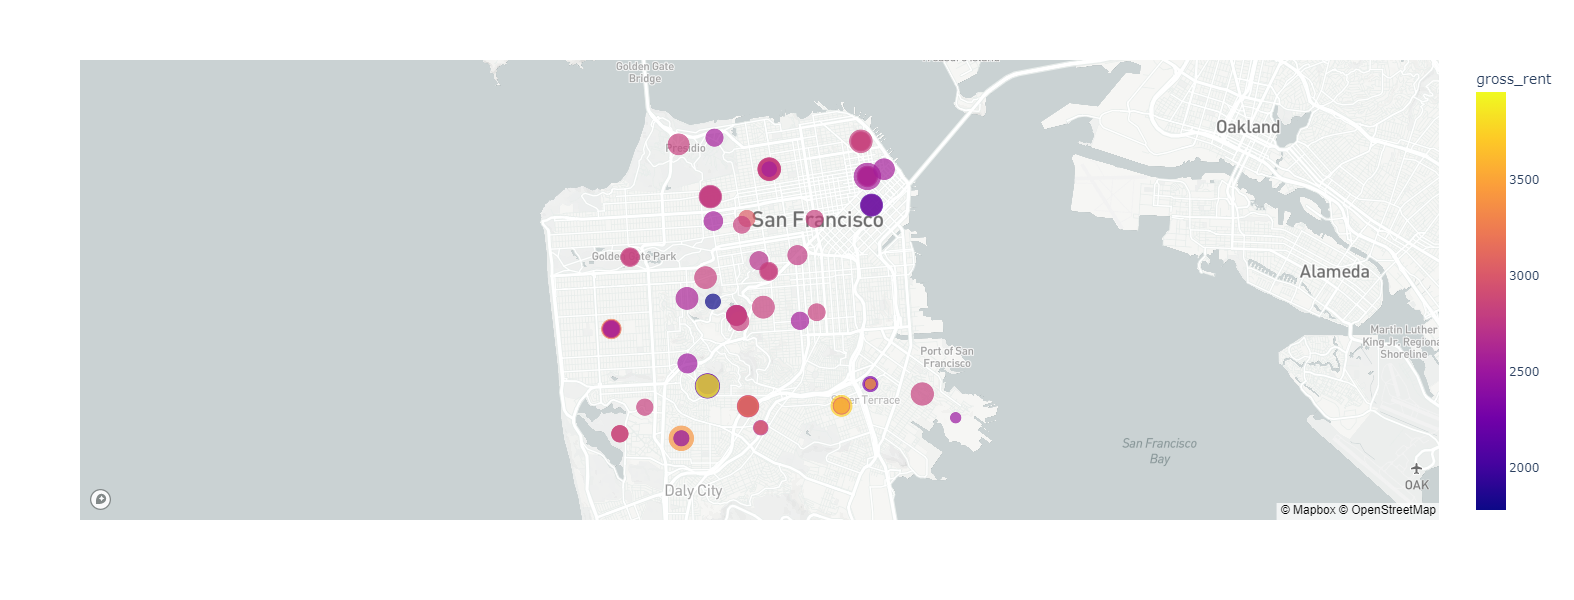

In [45]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    combined_df,
    height = 600, 
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=11
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [76]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                       
2010             Cow Hollow           569.379968         372560        1239
2010          Miraloma Park           680.608729         372560        1239
2010        Pacific Heights           496.516014         372560        1239
2010           Potrero Hill           491.450004         372560        1239
2010       Presidio Heights           549.417931         372560        1239
2010            South Beach          1037.099789         372560        1239
2010         Telegraph Hill           524.793509         372560        1239
2010  Union Square District           569.193448         372560        1239
2011             Cow Hollow           390.595653         374507        1530
2011          Miraloma Park           414.676065         374507        1530
2011        Pacific Heights           509.021480         374507        1530
2011           Potrero Hill           503.138505         374507        1530
2011       Presidio Heights           493.814917         374507        1530
2011            South Beach           388.644337         374507        1530
2011         Telegraph Hill           483.405773         374507        1530
2011  Union Square District           302.123253         374507        1530
2012             Cow Hollow           644.818307         376454        2324
2012         Merced Heights           421.141245         376454        2324
2012          Miraloma Park           756.192373         376454        2324
2012        Pacific Heights           586.218215         376454        2324
2012           Potrero Hill           466.647840         376454        2324
2012       Presidio Heights           426.608592         376454        2324
2012         Telegraph Hill           465.802122         376454        2324
2012  Union Square District           445.196788         376454        2324
2013             Cow Hollow           707.402809         378401        2971
2013        Pacific Heights           503.899261         378401        2971
2013           Potrero Hill           598.704795         378401        2971
2013       Presidio Heights           512.840248         378401        2971
2013         Telegraph Hill           653.311617         378401        2971
2013  Union Square District          1290.472107         378401        2971
2014             Cow Hollow           691.865411         380348        3528
2014         Merced Heights           528.726541         380348        3528
2014          Miraloma Park          1267.766203         380348        3528
2014        Pacific Heights           824.658694         380348        3528
2014           Potrero Hill          1045.201546         380348        3528
2014       Presidio Heights           603.450997         380348        3528
2014            South Beach           524.629312         380348        3528
2014         Telegraph Hill           708.193032         380348        3528
2014  Union Square District           558.271119         380348        3528
2014          Westwood Park           742.979723         380348        3528
2015             Cow Hollow           598.620541         382295        3739
2015        Pacific Heights           910.187690         382295        3739
2015           Potrero Hill           821.300990         382295        3739
2015       Presidio Heights                  NaN         382295        3739
2015         Telegraph Hill           996.990220         382295        3739
2015  Union Square District          2258.702832         382295        3739
2016             Cow Hollow          1059.065602         384242        4390
2016         Merced Heights          1416.666667         384242        4390
2016        Pacific Heights           996.389364         384242        4390
2016           Potrero Hill           707.651609         384242        4390
2016       Presidio Heights          1465.968586         384242

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!